In [1]:
import sys
from pathlib import Path

# Add src directory to Python path
src_path = "../src"
sys.path.insert(0, str(src_path))

Data:      x1  x2      x3
0  0.00   5  0.9301
1  0.25   4 -0.6397
2  0.50   3  0.4487
3  0.75   2  1.0125
4  1.00   1 -1.0354
Predictions: 0     5.9301
1     6.8603
2    10.4487
3    13.5125
4    13.9646
dtype: float64
ICE Predictions: HyperPlanes(grid=Grid(grid=[array([-0.1,  0.2,  0.5,  0.8,  1.1])]), targets=array([[ 4.93012806,  3.36030512,  4.44869137,  5.01246312,  2.96457893],
       [ 7.93012806,  6.36030512,  7.44869137,  8.01246312,  5.96457893],
       [10.93012806,  9.36030512, 10.44869137, 11.01246312,  8.96457893],
       [13.93012806, 12.36030512, 13.44869137, 14.01246312, 11.96457893],
       [16.93012806, 15.36030512, 16.44869137, 17.01246312, 14.96457893]]))
<class 'faxai.data.DataPlotter.DP_Collection'>


/tmp/ipykernel_49572/2523263288.py:78: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


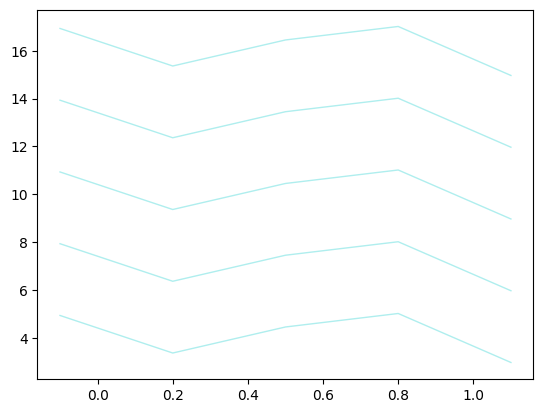

In [4]:
import logging

logging.getLogger(__name__).addHandler(logging.NullHandler())

# Activate debugging
# logging.basicConfig(level=logging.DEBUG)
# Silence traces from other modules except my library
logging.getLogger("faxai").setLevel(logging.DEBUG)

########################################################################################################################

import numpy as np
import pandas as pd

from faxai.mathing.distribution.parametric_distributions import NormalDistribution, UniformDistribution
from faxai.mathing.distribution.UnionDistribution import UnionDistribution
from faxai.mathing.RandomGenerator import RandomGenerator

# Set pandas print options for better readability, wider column and not breaking lines
pd.set_option('display.precision', 4)
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', None)


rng = RandomGenerator()

N = 5
df = pd.DataFrame({
    "x1": np.linspace(0, 1, N),
    "x2": np.array(range(N,0,-1)),
    "x3": rng.gauss(0, 1, N),
    "target": np.linspace(5, 15, N)
})


df_X, df_y = df[["x1", "x2", "x3"]], df["target"]

print(f"Data: {df_X.head()}")

class MockModel:
    def predict(self, df: pd.DataFrame) -> np.ndarray:
        return df["x1"] * 10 + 5 + df["x3"]

model = MockModel()

print(f"Predictions: {model.predict(df_X.head())}")


from faxai.explaining.ExplainerCore import ExplainerCore
from faxai.explaining.DataCore import DataCore
from faxai.explaining.ExplainerConfiguration import ExplainerConfiguration
from faxai.explaining.explainers.ICE import ICE

core = ExplainerCore(
    dataframe_X=df_X,
    model=model
)

conf1 = ExplainerConfiguration(
    datacore=core.datacore(),
    study_features=["x1"],
    bins=5,
    strict_limits=False,
)

core.add_configuration("conf1", conf1)

ice = core.explain(technique="ice", configuration="conf1")


print(f"ICE Predictions: {ice}")

dataplotter = core.plot(technique="ice", configuration="conf1", params={"alpha":1.0})

print(type(dataplotter))
print(dataplotter)
fig, ax = dataplotter.matplotlib_plot()
fig.show()


PDP Predictions: HyperPlane(grid=Grid(grid=[array([-0.1,  0.2,  0.5,  0.8,  1.1])]), target=array([ 3.88610948,  6.88610948,  9.88610948, 12.88610948, 15.88610948]))


/tmp/ipykernel_49572/2127258806.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


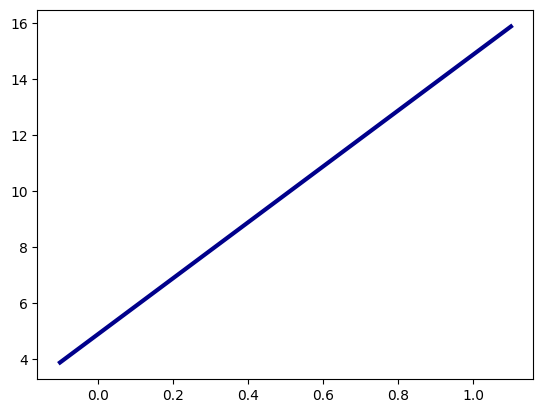

In [3]:
pdp = core.explain(technique="pdp", configuration="conf1")

print(f"PDP Predictions: {pdp}")

dataplotter = core.plot(technique="pdp", configuration="conf1")
fig, ax = dataplotter.matplotlib_plot()
fig.show()
